                     Name   category  category_id
0                  AAGRAH       Food            0
1       AAHANA ENTERPRISE       Food            0
2   AAISHREE KHODAL DHABA       Food            0
3  AAI SHREE KHODAL DHABA       Food            0
4  AAPESHWAR DAIRY PARLOU  Groceries            1


(18632, 2238)

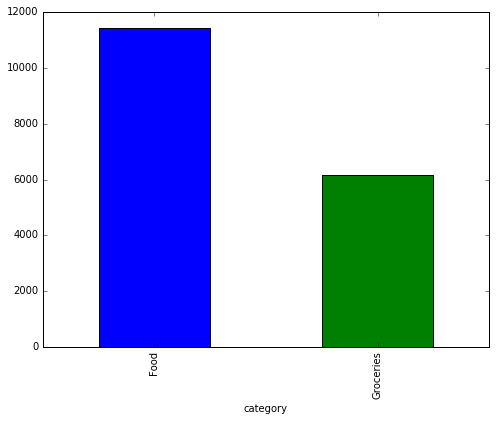

In [180]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
labelencoder_X = LabelEncoder()
interactions_df = pd.read_csv('/home/harish/Desktop/Merchant.csv')
#interactions_df.columns=['Name','category']
interactions_df['category_id'] = interactions_df['category'].factorize()[0]
print interactions_df.head(5)
fig = plt.figure(figsize=(8,6))
interactions_df.groupby('category').Name.count().plot.bar(ylim=0)
Name= interactions_df.loc[:,'Name']
interactions_df = interactions_df[pd.notnull(interactions_df.loc[:,'Name'])]
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='utf-8', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(interactions_df.loc[:,'Name']).toarray()
labels = interactions_df.category_id
features.shape


In [181]:
category_id_df = interactions_df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)

In [182]:
N = 2
for Name, category in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == interactions_df.category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(category))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# '-1':
  . Most correlated unigrams:
. holdings
. zone
  . Most correlated bigrams:
. hitec city
. hindu hotel
# '0':
  . Most correlated unigrams:
. holdings
. zone
  . Most correlated bigrams:
. hitec city
. hindu hotel
# '1':
  . Most correlated unigrams:
. holdings
. zone
  . Most correlated bigrams:
. hitec city
. hindu hotel


In [183]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(interactions_df['Name'], interactions_df['category_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

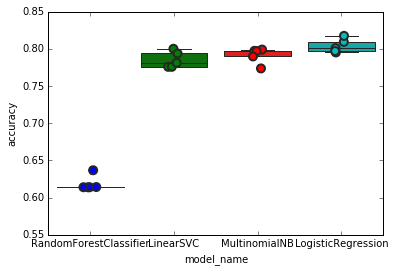

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [185]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.785421
LogisticRegression        0.804047
MultinomialNB             0.791433
RandomForestClassifier    0.618667
Name: accuracy, dtype: float64

In [186]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 0)
model=MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print cm

[[ 101   86   29]
 [   1 2129  132]
 [   2  290  957]]


In [187]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 0)
model=LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print cm

[[ 134   59   23]
 [   8 2114  140]
 [   8  278  963]]


In [188]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 0)
model=RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print cm

[[   0  216    0]
 [   0 2262    0]
 [   0 1249    0]]


In [189]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 0)
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print cm

[[ 102   92   22]
 [   4 2159   99]
 [   8  320  921]]


In [190]:
print(clf.predict(count_vect.transform(["AAPESHWAR DAIRY PARLOU"])))

[0]


In [191]:
print(clf.predict(count_vect.transform(["AAHANA ENTERPRISE"])))

[0]


In [192]:
print(clf.predict(count_vect.transform(["ALL FRESH"])))

[1]


In [193]:
print(clf.predict(count_vect.transform(["AMAZING FOODS"])))

[0]


In [194]:
print(clf.predict(count_vect.transform(["FRESHMART"])))

[1]


In [195]:
print(clf.predict(count_vect.transform(["BIG BAZAAR"])))

[1]


In [196]:
print(clf.predict(count_vect.transform(["BAUN BAUN SERVICES"])))

[1]
